In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_moons

In [4]:
np.random.seed(0)

In [5]:
X, y = make_moons(n_samples=400)

In [6]:
# kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
Y_kpca = kpca.fit_transform(X)

In [7]:
# PCA without kernel 
pca = PCA()
Y_pca = pca.fit_transform(X)

In [8]:
def kernel_matrix(x, kernel=None, d=3, sigma=None, C=1.0):
    n = x.shape[0] # n == 데이터의 갯수 
    if sigma is None:
        sigma = 1.0/n
    
    xxt = x.dot(x.T)
    
    if kernel == 'polynomial':
        return (C + xxt)**d
    elif kernel == 'sigmoid':
        return np.tanh(sigma*xxt + C)
    elif kernel == 'rbf':
        A = x.dot(x.T)
        B = np.repeat(np.diag(xxt), n).reshape(n,n)
        return np.exp(-(B.T - 2*A + B)/(2*sigma**2))
    else:
        pass 

# 모든 커널 중에 rbf 커널이 가장 분리가 잘됨. 
K = kernel_matrix(X, kernel='rbf', sigma = 1/np.sqrt(20))

n = K.shape[0]
one_mat = np.repeat(1/n, n**2).reshape(n, n)

# gram 은 정규화된 데이터를 가지고 있음. 
gram = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)
eigen_vals, eigen_vecs = np.linalg.eigh(gram)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda x: x[0], reverse=True)


n_components = 2
transformed_data = []

for j in range(n):
    loc=np.zeros(n_components)
    for k in range(n_components):
        inner_prod_sum = 0.
        for i in range(n): 
            inner_prod_sum = inner_prod_sum + eigen_pairs[k][1][i] * gram[j, i]
        loc[k] = inner_prod_sum/np.sqrt(eigen_pairs[k][0])

    transformed_data.append(loc)

transformed_data = np.array(transformed_data)

In [9]:
transformed_data

array([[-0.37082683,  0.31004293],
       [ 0.40579662,  0.09257089],
       [ 0.34480683,  0.3625263 ],
       [-0.0790834 ,  0.1487611 ],
       [ 0.26750568, -0.38337426],
       [-0.32545532, -0.35403687],
       [-0.29188433,  0.39365031],
       [ 0.32907062, -0.34968888],
       [-0.34480683,  0.3625263 ],
       [ 0.09599612, -0.2338332 ],
       [-0.22379661, -0.37025673],
       [-0.36561944,  0.32370022],
       [-0.40307931,  0.13614043],
       [ 0.32014021,  0.38618618],
       [-0.0837785 , -0.21684406],
       [-0.32176653, -0.35809483],
       [ 0.40234762, -0.08621447],
       [-0.34802158,  0.35787575],
       [ 0.04355482, -0.1646605 ],
       [-0.06474422,  0.12310676],
       [-0.18878114,  0.31870946],
       [ 0.35225872, -0.31143574],
       [-0.3882555 ,  0.24542119],
       [ 0.33469301,  0.37459901],
       [-0.19421296,  0.32536686],
       [ 0.40307931,  0.13614043],
       [-0.37862893, -0.23538794],
       [-0.10198082, -0.24215459],
       [ 0.39370278,

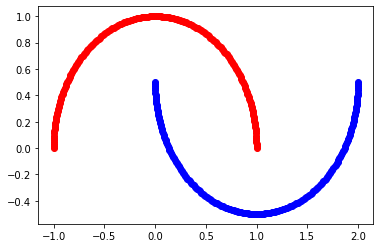

In [10]:
reds  = y == 0
blues = y == 1

# original space 
plt.scatter(X[reds,0],  X[reds,1],  c="red")
plt.scatter(X[blues,0], X[blues,1], c="blue")
plt.show()

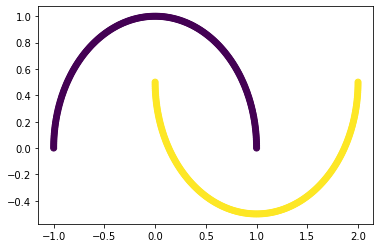

In [11]:
plt.scatter(X[:,0],  X[:,1],  c=y)
plt.show()

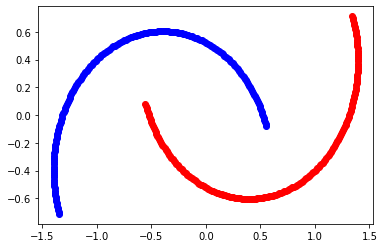

In [24]:
# PCA without Kernel 
plt.scatter(Y_pca[reds,0],  Y_pca[reds,1],  c="red")
plt.scatter(Y_pca[blues,0], Y_pca[blues,1], c="blue")
plt.show()
# 그냥 pca 는 선형으로 구분이 되지 않음 

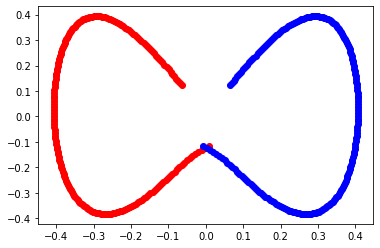

In [25]:
# kernel PCA + my code 
plt.scatter(transformed_data[reds, 0],  transformed_data[reds, 1],  c="red")
plt.scatter(transformed_data[blues,0],  transformed_data[blues,1],  c="blue")
plt.show()
# Kernel pca 는 선형으로 구분이 가능함 